### Importação dos dados



In [95]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [96]:
import matplotlib.pyplot as plt
lojas_dados = [loja, loja2, loja3, loja4]
lojas_titulo = []
faturamento = []

for idx, loja in enumerate(lojas_dados):
  fatu = sum(loja['Preço'])
  faturamento.append(round(fatu,3))
  lojas_titulo.append(f'Loja {idx + 1}')

faturamento_lojas = list(zip(lojas_titulo, faturamento))

print(f'O Faturamento das lojas são:')
print('-' * 70)
print(f"{'LOJA':<25}{'FATURAMENTO {R$}':>25}")
print('-' * 70)
for lo, f in faturamento_lojas:
  print(f"{lo:<25}{f:>25.2f}")




O Faturamento das lojas são:
----------------------------------------------------------------------
LOJA                              FATURAMENTO {R$}
----------------------------------------------------------------------
Loja 1                                  1534509.12
Loja 2                                  1488459.06
Loja 3                                  1464025.03
Loja 4                                  1384497.58


[1534509.12, 1488459.06, 1464025.03, 1384497.58]


<Figure size 200x200 with 0 Axes>

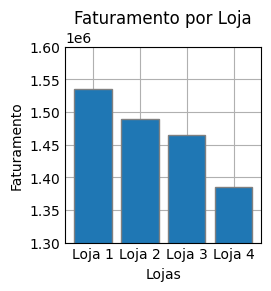

In [138]:
plt.style.use('_mpl-gallery')
plt.tight_layout()
print(faturamento)
x = lojas_titulo
y = faturamento

fig, ax = plt.subplots()
ax.bar(x, y, width=0.8, edgecolor="grey", linewidth=1)
ax.set(ylim=(1300000, 1600000))
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')

plt.show()


# 2. Vendas por Categoria


In [98]:
vendas_categoria_loja = {}

for idx, loja in enumerate(lojas_dados):
  categorias = list(set(loja['Categoria do Produto']))
  vendas_categoria = []

  for categoria in categorias:
    soma_vendasCategoria = []
    qtd_vendasCategoria = []
    cat = []
    porcentagem_faturamento = []
    soma_categoria = 0
    qtdade_categoria = 0

    for valores in range(len(loja)):
      if loja['Categoria do Produto'][valores] == categoria:
        soma_categoria = soma_categoria + loja['Preço'][valores]
        qtdade_categoria += 1
    soma_vendasCategoria.append(float(round(soma_categoria,3)))
    qtd_vendasCategoria.append(qtdade_categoria)
    cat.append(categoria)
    porcentagem_faturamento.append(100 * (soma_categoria/(sum(loja['Preço']))))

    vendas_categoria.append(cat + soma_vendasCategoria + qtd_vendasCategoria + porcentagem_faturamento)
    vendas_categoria_loja[f'Loja {idx + 1}'] = vendas_categoria

for loja in vendas_categoria_loja:
    vendas_categoria_loja[loja] = sorted(vendas_categoria_loja[loja], key=lambda x: x[2],reverse=True)

for chave, valores in vendas_categoria_loja.items():
  print('-' * 90)
  print(f'Para a {chave}, temos:')
  print(f"{'CATEGORIA':<25}{'VALOR VENDAS {R$}':>25}{'QTDADE VENDAS [u]':>20}{'% FATURAMENTO':>20}")
  print('-' * 90)
  for (cat, venda, qtd, por) in valores:
    print(f"{cat:<25}{venda:>25.2f}{qtd:>20}{round(por,2):>20}")




------------------------------------------------------------------------------------------
Para a Loja 1, temos:
CATEGORIA                        VALOR VENDAS {R$}   QTDADE VENDAS [u]       % FATURAMENTO
------------------------------------------------------------------------------------------
moveis                                   250178.11                 465                16.3
eletronicos                              572659.23                 448               37.32
brinquedos                                23993.78                 324                1.56
eletrodomesticos                         484913.36                 312                31.6
esporte e lazer                           52387.55                 284                3.41
instrumentos musicais                    121731.69                 182                7.93
livros                                    11713.92                 173                0.76
utilidades domesticas                     16931.48                 1

<Figure size 200x200 with 0 Axes>

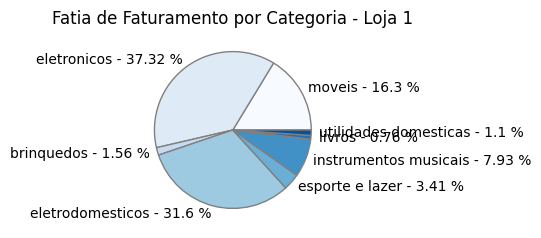

<Figure size 200x200 with 0 Axes>

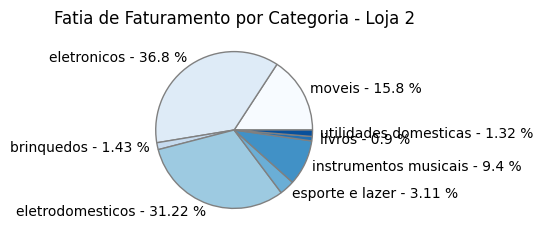

<Figure size 200x200 with 0 Axes>

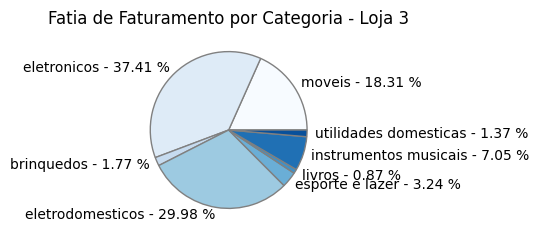

<Figure size 200x200 with 0 Axes>

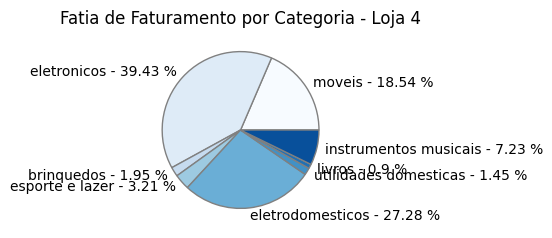

In [113]:
for chave, valores in vendas_categoria_loja.items():
  categorias = []
  percentuais = []

  for cat, venda, qtd, por in valores:
      categorias.append(f'{cat} - {round(por,2)} %')
      percentuais.append(por)

  plt.tight_layout()
  plt.style.use('_mpl-gallery-nogrid')

  cmap = plt.get_cmap('Blues')
  colors = [cmap(i / len(percentuais)) for i in range(len(percentuais))]

  fig, ax = plt.subplots()
  ax.pie(percentuais, labels=categorias, colors=colors,
          wedgeprops={"linewidth": 1, "edgecolor": "grey"})

  ax.set(aspect='equal')

  plt.title(f'Fatia de Faturamento por Categoria - {chave}')
  plt.show()


# 3. Média de Avaliação das Lojas

In [100]:
medias_avaliacao = []

for loja in lojas_dados:
  soma_media = sum(loja['Avaliação da compra'])
  media = soma_media / len(loja)
  medias_avaliacao.append(round(media,3))

medias_avaliacao_lojas = list(zip(lojas_titulo, medias_avaliacao))


print(f'A média de avaliação das lojas são:')
print('-' * 70)
print(f"{'LOJA':<25}{'MÉDIAS':>25}")
print('-' * 70)
for lo, media in medias_avaliacao_lojas:
  print(f"{lo:<25}{media:>25.2f}")


A média de avaliação das lojas são:
----------------------------------------------------------------------
LOJA                                        MÉDIAS
----------------------------------------------------------------------
Loja 1                                        3.98
Loja 2                                        4.04
Loja 3                                        4.05
Loja 4                                        4.00


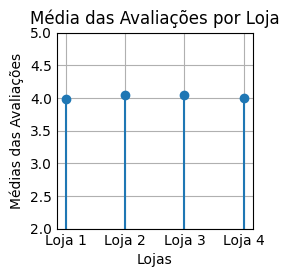

In [125]:
plt.style.use('_mpl-gallery')

x = lojas_titulo
y = medias_avaliacao

fig, ax = plt.subplots()
ax.stem(x, y)
ax.set(ylim=(2, 5))
plt.xlabel('Lojas')
plt.ylabel('Médias das Avaliações')
plt.title('Média das Avaliações por Loja')


plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
print('=' * 90)
for chave, valores in vendas_categoria_loja.items():
  print(f'Para a {chave}, temos:')
  print('-' * 90)
  print(f"{'Mais Vendido':<25}{'QTDADE VENDAS [u]':>20}{'Menos Vendido':>25}{'QTDADE VENDAS [u]':>20}")
  print('-' * 90)
  mais_vendido = max(vendas_categoria_loja[chave], key=lambda x: x[2])
  menos_vendido = min(vendas_categoria_loja[chave], key=lambda x: x[2])
  print(f"{mais_vendido[0]:<25}{mais_vendido[2]:>20}{menos_vendido[0]:>25}{menos_vendido[2]:>20}")
  print('=' * 90)


Para a Loja 1, temos:
------------------------------------------------------------------------------------------
Mais Vendido                QTDADE VENDAS [u]            Menos Vendido   QTDADE VENDAS [u]
------------------------------------------------------------------------------------------
moveis                                    465    utilidades domesticas                 171
Para a Loja 2, temos:
------------------------------------------------------------------------------------------
Mais Vendido                QTDADE VENDAS [u]            Menos Vendido   QTDADE VENDAS [u]
------------------------------------------------------------------------------------------
moveis                                    442    utilidades domesticas                 181
Para a Loja 3, temos:
------------------------------------------------------------------------------------------
Mais Vendido                QTDADE VENDAS [u]            Menos Vendido   QTDADE VENDAS [u]
------------------------

# 5. Frete Médio por Loja


In [121]:
fretes_medio = []

for loja in lojas_dados:
  soma_media = sum(loja['Frete'])
  media = soma_media / len(loja)
  fretes_medio.append(round(media,2))

medias_fretes_lojas = list(zip(lojas_titulo, fretes_medio))


print(f'A média dos frentes das lojas são:')
print('-' * 70)
print(f"{'LOJA':<25}{'MÉDIAS FRETES [R$]':>25}")
print('-' * 70)
for lo, media in medias_fretes_lojas:
  print(f"{lo:<25}{media:>20.2f}")

A média dos frentes das lojas são:
----------------------------------------------------------------------
LOJA                            MÉDIAS FRETES [R$]
----------------------------------------------------------------------
Loja 1                                  34.69
Loja 2                                  33.62
Loja 3                                  33.07
Loja 4                                  31.28


<Figure size 200x200 with 0 Axes>

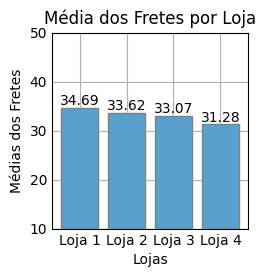

In [142]:
plt.style.use('_mpl-gallery')
plt.tight_layout()
x = lojas_titulo
y = fretes_medio

fig, ax = plt.subplots()
ax.bar(x, y, width=0.8, edgecolor="white", linewidth=1)
ax.set(ylim=(10, 50))
plt.bar_label(ax.bar(x, y, width=0.8, edgecolor="grey", linewidth=1), labels=y, label_type='edge')
plt.xlabel('Lojas')
plt.ylabel('Médias dos Fretes')
plt.title('Média dos Fretes por Loja')

plt.show()

**Relatório: Possibilidade de Venda unidade Allura Store**

**Introdução:**
Esse relatório contempla os seguintes dados: Faturamento, Vendas por Categoria, Média de Avaliação, Produtos Mais e Menos Vendidos e Frete Médio de todas as lojas que compreendem pertencentes a organização Allura Store. O objetivo da análise desses dados é evidenciar quais da lojas possui menor eficiência e auxiliar na decisão de qual delas será vendida para dar inicio a um novo empreendimento.

**Indicadores:**
Abaixo podemos observar detalhadamente os Faturamentos das lojas, Média das valiações das Lojas, Média dos Fretes por Loja e os produtos mais e menos vendidos de cada loja no último período, vide dash abaixo:

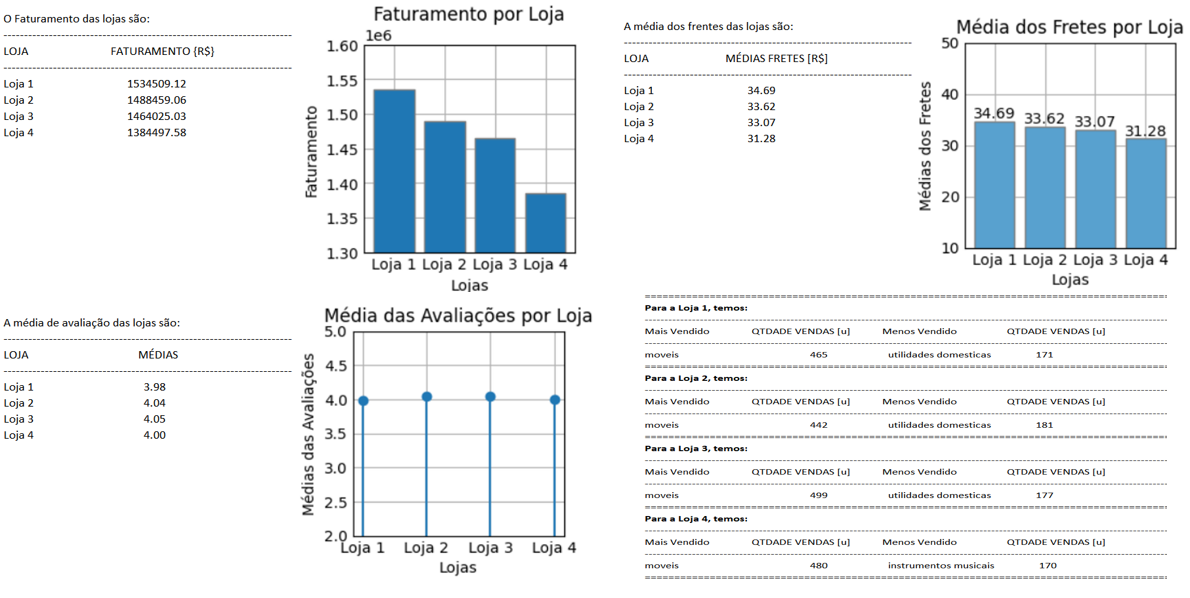

Abaixo podemos verificar a distribuição de produtos vendidos por categoria, destacando respectivamente, o faturamento desses produtos, quantidade vendida e a porcentagem do faturamento da respectiva loja:

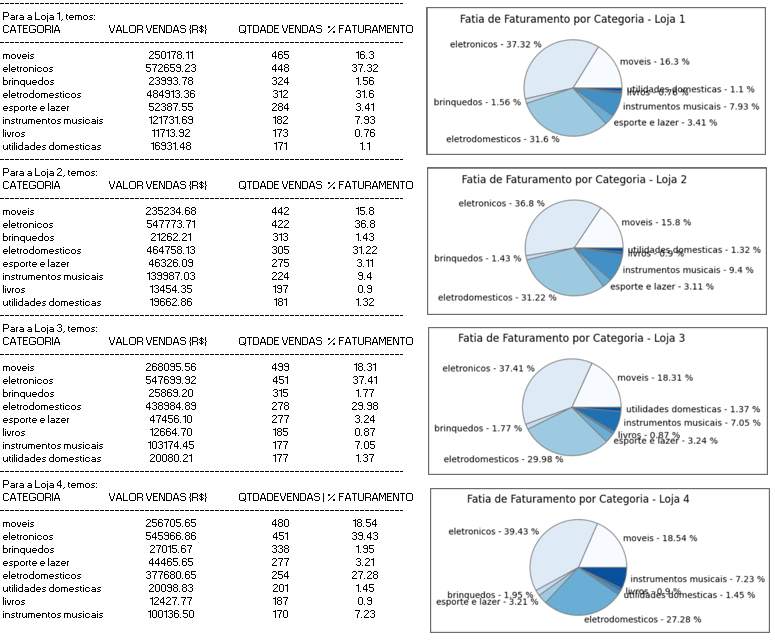

**Conclusão**

Considerando os indicadores e analise do dads, é possível concluir e sugerir que:

A Loja 4 deve ser vendida, pois:

1.   Tem o menor faturamento geral.
2.   Apresenta pior desempenho em vendas de categorias de alto valor, como eletrodomésticos e instrumentos musicais.
3.   A avaliação média é baixa, apenas melhor que a da Loja 1.
4.   Embora tenha o menor frete médio, isso não compensa a baixa rentabilidade e desempenho de vendas.




